## Problem: Number of closed Islands
LeetCode: 1254. Number of Closed Islands
https://leetcode.com/problems/number-of-closed-islands/description/

Given a 2D grid consists of <B>0s (land)</B> and <B>1s (water)</B>.  An island is a maximal 4-directionally connected group of 0s and a closed island is an island totally (all left, top, right, bottom) surrounded by 1s.

Return the number of closed islands.

 

Example 1:

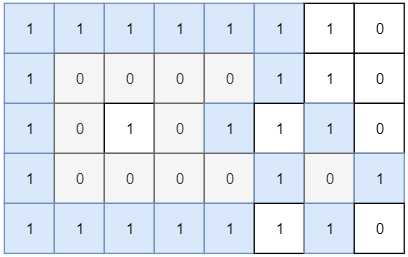

    Input: grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]]
    Output: 2
    Explanation: 
    Islands in gray are closed because they are completely surrounded by water (group of 1s).
Example 2:



    Input: grid = [[0,0,1,0,0],[0,1,0,1,0],[0,1,1,1,0]]
    Output: 1
Example 3:

    Input: grid = [[1,1,1,1,1,1,1],
                   [1,0,0,0,0,0,1],
                   [1,0,1,1,1,0,1],
                   [1,0,1,0,1,0,1],
                   [1,0,1,1,1,0,1],
                   [1,0,0,0,0,0,1],
                   [1,1,1,1,1,1,1]]
    Output: 2
 

Constraints:

    1 <= grid.length, grid[0].length <= 100
    0 <= grid[i][j] <=1

### Approach:
Island problems have simple technique to visit each cells, mark visited cell either modifying the matrix or taking auxiliary matrix with boolean values. This helps to avoid multiple time visit of same cell.
You can use DFS or BFS to solve it.
Here, as 0 represents the land, so start with cell having value = 0.
Do the DFS, and check the value of neighbouring cells, if it is also 0, then continue DFS else return 1 (count). To avoid revisiting the cells, set the visited cell's value as 2.
Count would be accoumulated in the main loop.
Trick: 
1. Start main loop from 1st row and col. Not from 0th. And end last row and col. As touching border would not be closed island.
2. In DFS, keep checking if the cell is touching to the border, if yes then entire land in not a closed island, return 0
3. If return value is zero, then save it in 'ans' variable and continue visiting the cells and updating it by 2 to mark that these cells are visited, it will avoid repeating the cells visit, also the cout is already save as 0.
4. Return ans. Note, 'ans' variable is initialized as 1, if no bordering cells encountered during DFS then it is a closed island and hence, return ans whose value is 1.

In [21]:
def closedIsland(grid):
    count= 0
    for i in range(1, len(grid)-1):
        for j in range(1, len(grid[i])-1):
            if grid[i][j] == 0:
                count += explore(i, j, grid)
    return count

def explore(row, col, grid):
    if row == 0 or col == 0 or row == len(grid)-1 or col == len(grid[row]) -1:
        return 0
    ans = 1
    grid[row][col] = 2
    nbrs = getNeighbours(row, col, grid)
    for nr,nc in nbrs:
        if grid[nr][nc] == 0:
            if explore(nr,nc, grid) == 0:
                ans = 0
    return ans

def getNeighbours(row, col, grid):
    nbrs = []
    if row>0:
        nbrs.append((row-1, col))
    if col>0:
        nbrs.append((row, col-1))
    if row < len(grid)-1:
        nbrs.append((row+1, col))
    if col < len(grid[row])-1:
        nbrs.append((row, col+1))
    return nbrs

In [22]:
grid = [[1,1,1,1,1,1,1,0],
        [1,0,0,0,0,1,1,0],
        [1,0,1,0,1,1,1,0],
        [1,0,0,0,0,1,0,1],
        [1,1,1,1,1,1,1,0]]
closedIsland(grid)

2

In [23]:
grid = [[0,0,1,1,0,1,0,0,1,0],
        [1,1,0,1,1,0,1,1,1,0],
        [1,0,1,1,1,0,0,1,1,0],
        [0,1,1,0,0,0,0,1,0,1],
        [0,0,0,0,0,0,1,1,1,0],
        [0,1,0,1,0,1,0,1,1,1],
        [1,0,1,0,1,1,0,0,0,1],
        [1,1,1,1,1,1,0,0,0,0],
        [1,1,1,0,0,1,0,1,0,1],
        [1,1,1,0,1,1,0,1,1,0]]
closedIsland(grid)

5